In [8]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [9]:
class Logistic_Binary:
    def __init__(self, X_test, y_test, X_train, y_train, alpha=0.01, max_iter=10):
        self.X_test = X_test
        self.y_test = y_test
        self.X_train = X_train
        self.y_train = y_train
        self.alpha = alpha
        self.max_iter = max_iter
        self.W = np.zeros(X_train.shape[1])
        self.b = 0
        self.weight_array = []
        self.bias_array = []
        self.weight_array.append(self.W)
        self.bias_array.append(self.b)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def predict(self, Z):
        hypothesis = self.sigmoid(Z)
        if hypothesis >= 0.5:
            return 1
        else:
            return 0
    
    def loss(self):
        m = self.X_train.shape[0]
        y_hat = self.sigmoid(np.dot(self.X_train, self.W) + self.b)
        loss = -1/m * np.sum(self.y_train * np.log(y_hat) + (1 - self.y_train) * np.log(1 - y_hat))
        return loss
    
    def accuracy(self):
        correct = 0
        for i in range(self.X_train.shape[0]):
            y_hat = self.predict(np.dot(self.X_train[i], self.W) + self.b)
            if y_hat == self.y_train[i]:
                correct += 1
        return correct / self.X_train.shape[0]
    
    def fit(self):
        m = self.X_train.shape[0]
        
        for epoch in range(self.max_iter):
            for i in range(m):
                x_i = self.X_train[i]
                # print(x_i)
                y_i = self.y_train[i]
                # print(y_i)
                z_i = np.dot(x_i, self.W) + self.b
                y_hat_i = self.sigmoid(z_i)
                # print(y_hat_i)
                error_i = y_hat_i - y_i
                # print(error_i)
                self.W -= self.alpha * error_i * x_i
                # print(self.b)
                self.b -= self.alpha * error_i
                # print(self.b)
                self.weight_array.append(self.W)
                self.bias_array.append(self.b)
                
            # print(self.b.shape)
            loss = self.loss()
            accuracy = self.accuracy()
            print(f'Epoch {epoch + 1}\tLoss: {loss}\tAccuracy: {accuracy}')

        
        return self.W, self.b
    
    def test(self):
        correct = 0
        for i in range(self.X_test.shape[0]):
            y_hat = self.predict(np.dot(self.X_test[i], self.W) + self.b)
            if y_hat == self.y_test[i]:
                correct += 1
        print(f'Test Accuracy: {correct / self.X_test.shape[0]}')
        return correct / self.X_test.shape[0]
    

In [10]:
class Logistic_Binary_Torch:
    def __init__(self, X_test, y_test, X_train, y_train, alpha=0.01, max_iter=10):
        self.X_test = X_test
        self.y_test = y_test
        self.X_train = X_train
        self.y_train = y_train
        self.alpha = alpha
        self.max_iter = max_iter
        self.W = torch.randn(X_train.shape[1], requires_grad=True)
        self.b = torch.randn(1, requires_grad=True)
        self.weight_array = []
        self.bias_array = []
        self.weight_array.append(self.W)
        self.bias_array.append(self.b)
        # converting to torch tensors
        self.X_train = torch.tensor(self.X_train, dtype=torch.float32)
        self.y_train = torch.tensor(self.y_train, dtype=torch.float32)
        self.X_test = torch.tensor(self.X_test, dtype=torch.float32)
        self.y_test = torch.tensor(self.y_test, dtype=torch.float32)

    def train(self):
        m = self.X_train.shape[0]
        for epoch in range(self.max_iter):
            for i in range(m):
                x_i = torch.tensor(self.X_train[i], dtype=torch.float32)
                y_i = torch.tensor(self.y_train[i], dtype=torch.float32)
                z_i = torch.dot(x_i, self.W) + self.b
                y_hat_i = torch.sigmoid(z_i)
                loss = -1 * (y_i * torch.log(y_hat_i) + (1 - y_i) * torch.log(1 - y_hat_i))
                loss.backward()
                with torch.no_grad():
                    self.W -= self.alpha * self.W.grad
                    self.b -= self.alpha * self.b.grad
                    self.W.grad.zero_()
                    self.b.grad.zero_()
                self.weight_array.append(self.W)
                self.bias_array.append(self.b)
            loss = self.loss()
            accuracy = self.accuracy()
            print(f'Epoch {epoch + 1}\tLoss: {loss}\tAccuracy: {accuracy}')

        
        return self.W, self.b
    
    def test(self):
        correct = 0
        for i in range(self.X_test.shape[0]):
            x_i = torch.tensor(self.X_test[i], dtype=torch.float32)
            y_hat = self.predict(torch.dot(x_i, self.W) + self.b)
            if y_hat == self.y_test[i]:
                correct += 1
        print(f'Test Accuracy: {correct / self.X_test.shape[0]}')
        return correct / self.X_test.shape[0]
    
    def loss(self):
        m = self.X_train.shape[0]
        y_hat = torch.sigmoid(torch.matmul(self.X_train, self.W) + self.b)
        loss = -1/m * torch.sum(self.y_train * torch.log(y_hat) + (1 - self.y_train) * torch.log(1 - y_hat))
        return loss
    
    def accuracy(self):
        correct = 0
        for i in range(self.X_train.shape[0]):
            x_i = torch.tensor(self.X_train[i], dtype=torch.float32)
            y_hat = self.predict(torch.dot(x_i, self.W) + self.b)
            if y_hat == self.y_train[i]:
                correct += 1
        return correct / self.X_train.shape[0]
    
    def predict(self, Z):
        hypothesis = torch.sigmoid(Z)
        if hypothesis >= 0.5:
            return 1
        else:
            return 0

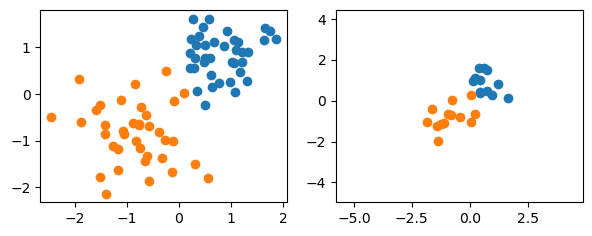

In [11]:
data = np.genfromtxt('C:\\Users\\dikss\\Capstone Projects\\Data-Science-Capstones\\Perceptron\\toydata.txt', delimiter='\t')
x = data[:, :2].astype(np.float32)
y = data[:, 2].astype(np.int64)

np.random.seed(123)
idx = np.arange(y.shape[0])
np.random.shuffle(idx)
X_test, y_test = x[idx[:25]], y[idx[:25]]
X_train, y_train = x[idx[25:]], y[idx[25:]]
mu, std = np.mean(X_train, axis=0), np.std(X_train, axis=0)
X_train, X_test = (X_train - mu) / std, (X_test - mu) / std

fig, ax = plt.subplots(1, 2, figsize=(7, 2.5))
ax[0].scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1])
ax[0].scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1])
ax[1].scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1])
ax[1].scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1])
plt.xlim([x[:, 0].min()-0.5, x[:, 0].max()+0.5])
plt.ylim([x[:, 1].min()-0.5, x[:, 1].max()+0.5])
plt.show()

In [12]:
model = Logistic_Binary(X_test, y_test, X_train, y_train, .01, 1000)
model.fit()
model.test()


model_torch = Logistic_Binary_Torch(X_test, y_test, X_train, y_train, .01, 1000)
model_torch.train()
model_torch.test()

Epoch 1	Loss: 0.49725788956451844	Accuracy: 0.9733333333333334
Epoch 2	Loss: 0.3873724283614541	Accuracy: 0.9733333333333334
Epoch 3	Loss: 0.31979740001172685	Accuracy: 0.9733333333333334
Epoch 4	Loss: 0.27465744122618657	Accuracy: 0.9733333333333334
Epoch 5	Loss: 0.24251418571664504	Accuracy: 0.9733333333333334
Epoch 6	Loss: 0.21848801406702584	Accuracy: 0.9733333333333334
Epoch 7	Loss: 0.1998455475557337	Accuracy: 0.9733333333333334
Epoch 8	Loss: 0.1849490511492118	Accuracy: 0.9733333333333334
Epoch 9	Loss: 0.17276154051586554	Accuracy: 0.9733333333333334
Epoch 10	Loss: 0.16259590326273196	Accuracy: 0.9733333333333334
Epoch 11	Loss: 0.15397935121778517	Accuracy: 0.9733333333333334
Epoch 12	Loss: 0.1465760937059299	Accuracy: 0.9733333333333334
Epoch 13	Loss: 0.14014113127324535	Accuracy: 0.9733333333333334
Epoch 14	Loss: 0.13449152628727126	Accuracy: 0.9733333333333334
Epoch 15	Loss: 0.12948791586786823	Accuracy: 0.9733333333333334
Epoch 16	Loss: 0.12502225483338442	Accuracy: 0.973333

C:\Users\dikss\AppData\Local\Temp\ipykernel_91872\2184985498.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_i = torch.tensor(self.X_train[i], dtype=torch.float32)
C:\Users\dikss\AppData\Local\Temp\ipykernel_91872\2184985498.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_i = torch.tensor(self.y_train[i], dtype=torch.float32)
C:\Users\dikss\AppData\Local\Temp\ipykernel_91872\2184985498.py:64: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_i = torch.tensor(self.X_train[i], dtype=torch.float32)


Epoch 3	Loss: 0.7332558035850525	Accuracy: 0.49333333333333335
Epoch 4	Loss: 0.5298290848731995	Accuracy: 0.68
Epoch 5	Loss: 0.40782320499420166	Accuracy: 0.8533333333333334
Epoch 6	Loss: 0.33184614777565	Accuracy: 0.9333333333333333
Epoch 7	Loss: 0.2815875709056854	Accuracy: 0.96
Epoch 8	Loss: 0.2463744431734085	Accuracy: 0.96
Epoch 9	Loss: 0.220489963889122	Accuracy: 0.96
Epoch 10	Loss: 0.2007111757993698	Accuracy: 0.96
Epoch 11	Loss: 0.18511785566806793	Accuracy: 0.9733333333333334
Epoch 12	Loss: 0.1725073605775833	Accuracy: 0.9733333333333334
Epoch 13	Loss: 0.16209296882152557	Accuracy: 0.9733333333333334
Epoch 14	Loss: 0.1533401757478714	Accuracy: 0.9733333333333334
Epoch 15	Loss: 0.14587412774562836	Accuracy: 0.9733333333333334
Epoch 16	Loss: 0.13942453265190125	Accuracy: 0.9733333333333334
Epoch 17	Loss: 0.13379186391830444	Accuracy: 0.9733333333333334
Epoch 18	Loss: 0.12882572412490845	Accuracy: 0.9733333333333334
Epoch 19	Loss: 0.12441051751375198	Accuracy: 0.9866666666666667


C:\Users\dikss\AppData\Local\Temp\ipykernel_91872\2184985498.py:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_i = torch.tensor(self.X_test[i], dtype=torch.float32)


0.96

In [13]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x: 'float | ArrayLike', y: 'float | ArrayLike', s: 'float | ArrayLike | None' = None, c: 'ArrayLike | Sequence[ColorType] | ColorType | None' = None, marker: 'MarkerType | None' = None, cmap: 'str | Colormap | None' = None, norm: 'str | Normalize | None' = None, vmin: 'float | None' = None, vmax: 'float | None' = None, alpha: 'float | None' = None, linewidths: 'float | Sequence[float] | None' = None, *, edgecolors: "Literal['face', 'none'] | ColorType | Sequence[ColorType] | None" = None, plotnonfinite: 'bool' = False, data=None, **kwargs) -> 'PathCollection'
    A scatter plot of *y* vs. *x* with varying marker size and/or color.

    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.

    s : float or array-like, shape (n, ), optional
        The marker size in points**2 (typographic points are 1/72 in.).
        Default is ``rcParams['lines.markersize'] ** 2``.

        The 

[7.21651828 3.80506695] -1.297667103918823
<class 'numpy.ndarray'> <class 'numpy.float64'>


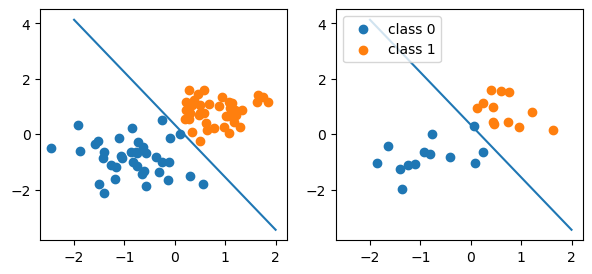

In [14]:
w, b = model.W, model.b

print(w, b)
print(type(w), type(b))

x_min = -2
y_min = ( (-(w[0] * x_min) - b) 
          / w[1] )

x_max = 2
y_max = ( (-(w[0] * x_max) - b) 
          / w[1] )


fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x_min, x_max], [y_min, y_max])
ax[1].plot([x_min, x_max], [y_min, y_max])
# i want both the classes to be represented by circle only

ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='o')

ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='o')

ax[1].legend(loc='upper left')
plt.show()

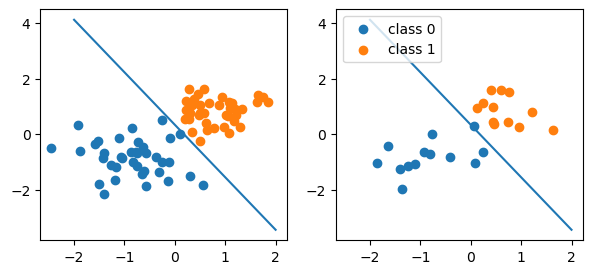

In [15]:
W_torch, b_torch = model_torch.W.detach().numpy(), model_torch.b.detach().numpy()

x_min = -2
y_min = ( (-(W_torch[0] * x_min) - b_torch) 
          / W_torch[1] )

x_max = 2
y_max = ( (-(W_torch[0] * x_max) - b_torch) 
          / W_torch[1] )

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x_min, x_max], [y_min, y_max])
ax[1].plot([x_min, x_max], [y_min, y_max])

ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='o')

ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='o')

ax[1].legend(loc='upper left')
plt.show()

In [16]:
model.weight_array

[array([7.21651828, 3.80506695]),
 array([7.21651828, 3.80506695]),
 array([7.21651828, 3.80506695]),
 array([7.21651828, 3.80506695]),
 array([7.21651828, 3.80506695]),
 array([7.21651828, 3.80506695]),
 array([7.21651828, 3.80506695]),
 array([7.21651828, 3.80506695]),
 array([7.21651828, 3.80506695]),
 array([7.21651828, 3.80506695]),
 array([7.21651828, 3.80506695]),
 array([7.21651828, 3.80506695]),
 array([7.21651828, 3.80506695]),
 array([7.21651828, 3.80506695]),
 array([7.21651828, 3.80506695]),
 array([7.21651828, 3.80506695]),
 array([7.21651828, 3.80506695]),
 array([7.21651828, 3.80506695]),
 array([7.21651828, 3.80506695]),
 array([7.21651828, 3.80506695]),
 array([7.21651828, 3.80506695]),
 array([7.21651828, 3.80506695]),
 array([7.21651828, 3.80506695]),
 array([7.21651828, 3.80506695]),
 array([7.21651828, 3.80506695]),
 array([7.21651828, 3.80506695]),
 array([7.21651828, 3.80506695]),
 array([7.21651828, 3.80506695]),
 array([7.21651828, 3.80506695]),
 array([7.2165